In [1005]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1006]:
data = pd.read_csv('supermarket_sales - Sheet1.csv', parse_dates=['Date'])

## Exploratory Data Analysis 🔎

In [1007]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [1008]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [1009]:
data.shape

(1000, 17)

In [1010]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [1011]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [1012]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [1013]:
cat=[]  # List to store categorical column names
num=[]  # List to store numerical column names
# Iterate through each column in the 'data' DataFrame
for column in data.columns: 
 # Check if the number of unique values in the column is greater than 10
    if data[column].nunique() > 10:
# If the condition is met, the column is considered numerical
        num.append(column)
# If the condition is not met, the column is considered categorical
    else:
        cat.append(column)

In [1014]:
cat

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

In [1015]:
num

['Invoice ID',
 'Unit price',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross income',
 'Rating']

# Sales & Income 💰


## Total Sales 📉

In [1016]:
Total_Sales = data['Total'].sum()
print({Total_Sales})

{322966.749}


## Total Gross Income 💵

In [1017]:
Total_Gross_Income = data['gross income'].sum()
print({Total_Gross_Income})

{15379.368999999999}


## Total Cogs 💸

In [1018]:
Total_Cogs = data['cogs'].sum()
print({Total_Cogs})

{307587.38}


## The Most Popular Payment Method Used By Customers 💵

In [1019]:
data.groupby('Payment').get_group('Ewallet')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2


<Axes: xlabel='Payment'>

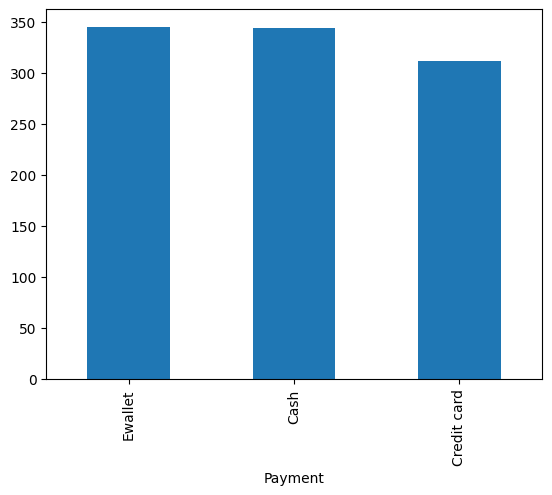

In [1020]:
data['Payment'].value_counts().plot(kind="bar")

In [1021]:
data.groupby('Customer type').get_group('Member')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,2019-03-29,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,15:46,Credit card,602.96,4.761905,30.1480,8.4
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7


In [1022]:
data.groupby('Customer type').get_group('Normal')


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4


<Axes: xlabel='Customer type'>

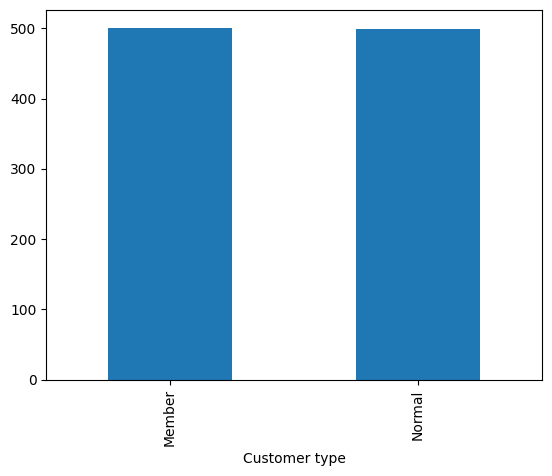

In [1023]:
data['Customer type'].value_counts().plot(kind="bar")

## Product Performance ✨

<Axes: xlabel='Product line'>

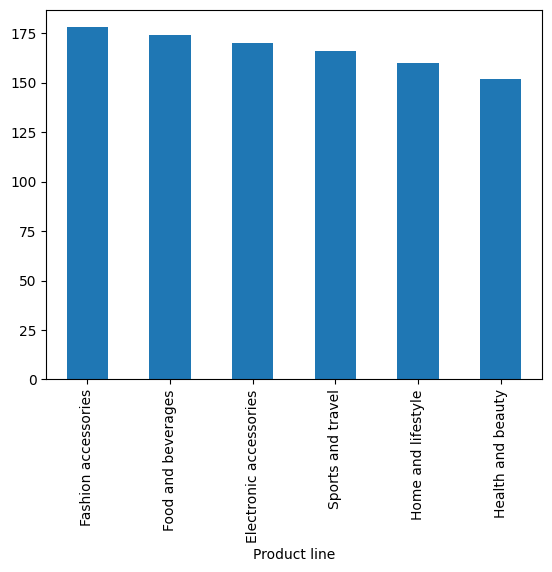

In [1024]:
data['Product line'].value_counts().plot(kind="bar")

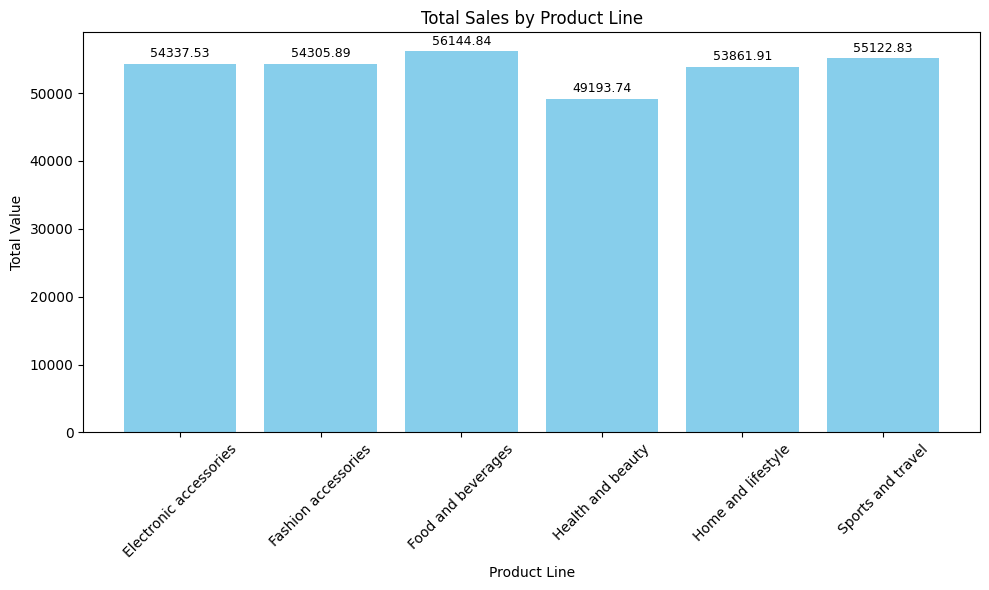

In [1025]:
plt.figure(figsize=(10, 6))
plt.bar(Total_Value['Product line'], Total_Value['Total'], color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Total Value')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
total_values = Total_Value['Total']
for i, v in enumerate(total_values):
    plt.text(i, v + 500, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()